In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "C:/Users/Krishna/OneDrive/Desktop/Machine Learning/Hindi/First Project/placement.csv"
df = pd.read_csv(url)


# Displaying Data

In [3]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

# steps that followed

In [4]:
# Steps

# 0. Preprocess + EDA + Feature Selection  ///later we will do feature selection which is not mention in this project
# 1. Extract input and output cols
# 2. Train test split
# 3. Scale the values
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

# preprocessing the data

In [5]:
df=df.iloc[:,1:]

In [6]:
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

# EDA

In [7]:
import matplotlib.pyplot as plt

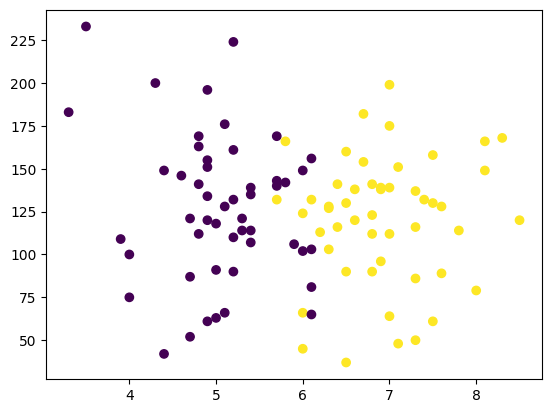

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# 1. Extract input and output cols

In [9]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [10]:
x

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# 2. Train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)


In [13]:
X_train

cgpa     iq
14   6.1  103.0
96   4.4   42.0
42   7.6   89.0
39   4.6  146.0
99   6.2  113.0
..   ...    ...
72   7.3  116.0
51   4.8  141.0
59   4.8  112.0
4    5.8  142.0
21   7.1  151.0

[90 rows x 2 columns]

In [14]:
X_test

cgpa     iq
9    5.1   66.0
90   7.3   86.0
57   6.5  130.0
3    7.4  132.0
81   5.4  107.0
55   7.8  114.0
36   5.7  140.0
84   5.7  169.0
34   4.8  163.0
74   6.7  154.0

In [15]:
Y_train

14    0
96    0
42    1
39    0
99    1
     ..
72    1
51    0
59    0
4     0
21    1
Name: placement, Length: 90, dtype: int64

In [16]:
Y_test

9     0
90    1
57    1
3     1
81    0
55    1
36    0
84    0
34    0
74    1
Name: placement, dtype: int64

# 3. Scale the values

In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[ 0.11887854, -0.50070843],
       [-1.35985451, -2.00530028],
       [ 1.42364299, -0.8460246 ],
       [-1.18588591,  0.55990549],
       [ 0.20586284, -0.25405403],
       [-0.75096443,  1.29986869],
       [-0.92493302, -1.53665692],
       [-0.66398013, -0.82135916],
       [ 0.03189424, -1.93130396],
       [-2.14271318,  2.70579878],
       [ 1.85856448,  0.63390181],
       [ 0.46681573,  0.90522165],
       [ 0.98872151, -1.85730764],
       [-1.35985451,  0.63390181],
       [-0.66398013,  2.48380982],
       [ 0.03189424, -0.52537387],
       [ 0.03189424, -1.41332972],
       [-0.92493302,  0.68323269],
       [ 0.11887854,  0.21458933],
       [ 0.29284713,  0.09126213],
       [-0.49001154,  0.38724741],
       [ 0.11887854, -1.04334812],
       [ 1.1626901 , -1.80797676],
       [-0.22905865,  0.21458933],
       [-1.79477599, -0.35271579],
       [-0.92493302, -0.08139595],
       [-0.14207435,  1.05321429],
       [-0.22905865,  0.48590917],
       [ 1.33665869,

In [20]:
X_test= scaler.transform(X_test)

In [21]:
X_test

array([[-0.75096443, -1.41332972],
       [ 1.1626901 , -0.92002092],
       [ 0.46681573,  0.16525845],
       [ 1.2496744 ,  0.21458933],
       [-0.49001154, -0.40204667],
       [ 1.59761159, -0.22938859],
       [-0.22905865,  0.41191285],
       [-0.22905865,  1.12721061],
       [-1.01191732,  0.97921797],
       [ 0.64078432,  0.75722901]])

# 4. Train the model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
#fit method is used for model training
clf.fit(X_train, Y_train)

LogisticRegression()

# 5. Evaluate the model/model selection

In [25]:
# generally we are checking accuracy on x_test data
y_pred=clf.predict(X_test)
# here i had created one variable y_pred that will comapare x_test and y_test data

In [26]:
Y_test

9     0
90    1
57    1
3     1
81    0
55    1
36    0
84    0
34    0
74    1
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

1.0

# how to plot decision boundary(it means what machine learning model finds the pattern in the data)

In [30]:
# installing mlextend into the current Jupyter kernel
import sys
!{sys.executable} -m pip install mlxtend

  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: C:\Users\Krishna\anaconda3\envs\py312env\python.exe -m pip install --upgrade pip


In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

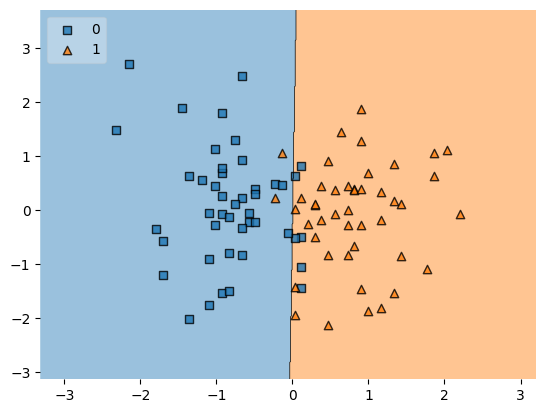

In [32]:
plot_decision_regions(X_train,Y_train.values, clf=clf, legend=2)
# I haven't use X_train.values because i had already scaled the value of X. legend means two shape will placed in upper left corner.

# converting the model into website and deploying it

In [33]:
# pickle is used to convert the object(python code) into the file and that file can be used in any environment
import pickle

In [34]:
pickle.dump(clf,open('model.pkl','wb'))